In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import numpy as np
import ast
import emoji
import os

In [12]:
if not os.path.exists("tweets_procesados.csv"):
    raise FileNotFoundError("El archivo tweets_procesados.csv no se encuentra en la carpeta actual.")
df = pd.read_csv("tweets_procesados.csv")

In [13]:
df.head(5)

,user_name,text,Hashtags,URLs,Prices,Emoticons,Mentions
0,ChefSam,Which #bitcoin books should I think about read...,['#bitcoin'],['https://t.co/32gas26rKB'],[],[],[]
1,Roy⚡️,"@ThankGodForBTC I appreciate the message, but ...",['#Bitcoin'],[],[],[],['@ThankGodForBTC']
2,Ethereum Yoda,#Ethereum price update: \n\n#ETH $1664.02 USD\...,"['#Ethereum', '#ETH', '#Bitcoin', '#BTC', '#al...",[],[1664.02],[],[]
3,Viction,CoinDashboard v3.0 is here\nAvailable on ios a...,['#Bitcoin'],['https://t.co/tMCQllv9rj'],[],[],[]
4,Rosie,#Bitcoin Short Term Fractal (4H)💥\n\nIn lower ...,"['#Bitcoin', '#BTC']",['https://t.co/2MG9yL7SDa'],[],"['💥', '🫡']",[]


In [14]:
df["Hashtags"] = df["Hashtags"].dropna().apply(ast.literal_eval)
df["URLs"] = df["URLs"].dropna().apply(ast.literal_eval)
df["Prices"] = df["Prices"].dropna().apply(ast.literal_eval)
df["Emoticons"] = df["Emoticons"].dropna().apply(ast.literal_eval)
df["Mentions"] = df["Mentions"].dropna().apply(ast.literal_eval)

In [15]:
df.head(5)

,user_name,text,Hashtags,URLs,Prices,Emoticons,Mentions
0,ChefSam,Which #bitcoin books should I think about read...,[#bitcoin],[https://t.co/32gas26rKB],[],[],[]
1,Roy⚡️,"@ThankGodForBTC I appreciate the message, but ...",[#Bitcoin],[],[],[],[@ThankGodForBTC]
2,Ethereum Yoda,#Ethereum price update: \n\n#ETH $1664.02 USD\...,"[#Ethereum, #ETH, #Bitcoin, #BTC, #altcoin, #c...",[],[1664.02],[],[]
3,Viction,CoinDashboard v3.0 is here\nAvailable on ios a...,[#Bitcoin],[https://t.co/tMCQllv9rj],[],[],[]
4,Rosie,#Bitcoin Short Term Fractal (4H)💥\n\nIn lower ...,"[#Bitcoin, #BTC]",[https://t.co/2MG9yL7SDa],[],"[💥, 🫡]",[]


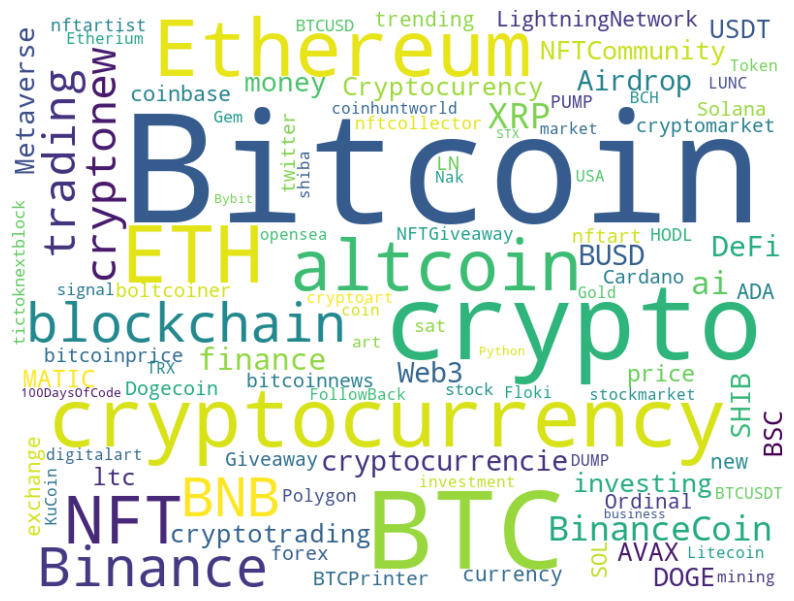

In [16]:
hashtags_series = df['Hashtags'].explode().dropna()
hashtags_text = ' '.join(hashtags_series.astype(str))

wordcloud = WordCloud(
    width=800,
    height=600,
    background_color="white",
    max_words=100,
    collocations=False
).generate(hashtags_text)

wordcloud.generate(hashtags_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

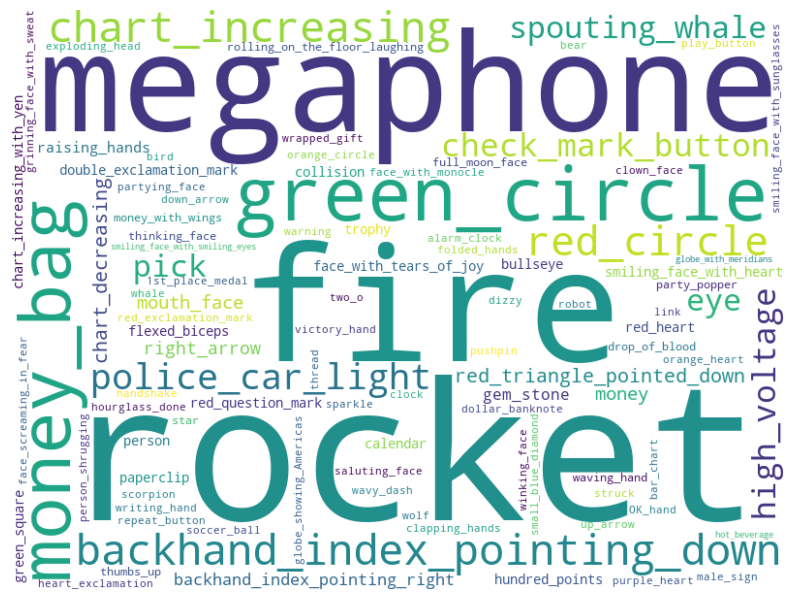


Top 5 emojis más usados:
🚀 - rocket (6878 veces)
📣 - megaphone (5474 veces)
🟢 - green_circle (5100 veces)
🔴 - red_circle (3881 veces)
📈 - chart_increasing (3733 veces)


In [17]:
emojis_series = df['Emoticons'].explode()
emojis_text = ' '.join(emojis_series.dropna().astype(str))

emojis_text_desc = emoji.demojize(emojis_text, delimiters=(" ", " "))

emoji_counts = Counter(emojis_series)

top_5_emojis = emoji_counts.most_common(5)

top_5_list = [(e, emoji.demojize(e).replace(":", ""), count) for e, count in top_5_emojis]

wordcloud = WordCloud(
    width=800,
    height=600,
    background_color="white",
    max_words=100,
    collocations=False
).generate(emojis_text_desc)

wordcloud.generate(emojis_text_desc)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

print("\nTop 5 emojis más usados:")
for emoji_char, description, count in top_5_list:
    print(f"{emoji_char} - {description} ({count} veces)")


Número total de tweets: 169820
Numero de tweets con links a otros tweets (quote tweets): 96423
Porcentaje de tweets con links a otros tweets (quote tweets): 56.78%


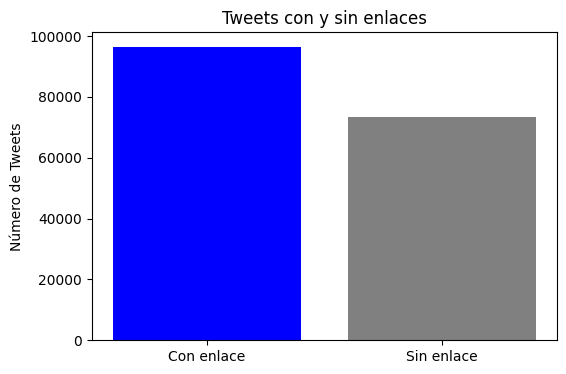

In [ ]:
print(f"Número total de tweets: {len(df)}")

tweets_with_twitter_links = df["URLs"].apply(lambda urls: any("t.co" in url for url in urls)).sum()
print(f"Numero de tweets con enlaces a otros tweets (quote tweets): {tweets_with_twitter_links}")
percentage_tweets_with_twitter_links = (tweets_with_twitter_links / len(df)) * 100
print(f"Porcentaje de tweets con enlaces a otros tweets (quote tweets): {percentage_tweets_with_twitter_links:.2f}%")

plt.figure(figsize=(6, 4))
plt.bar(["Con enlace", "Sin enlace"], [tweets_with_twitter_links, len(df) - tweets_with_twitter_links], color=["blue", "gray"])
plt.ylabel("Número de Tweets")
plt.title("Tweets con y sin enlaces")
plt.show()

0           []
1           []
2    [1664.02]
3           []
4           []
5           []
6           []
7           []
8           []
9           []
Name: ConvertedPrices, dtype: object
Maximum price: 42000000000000.0


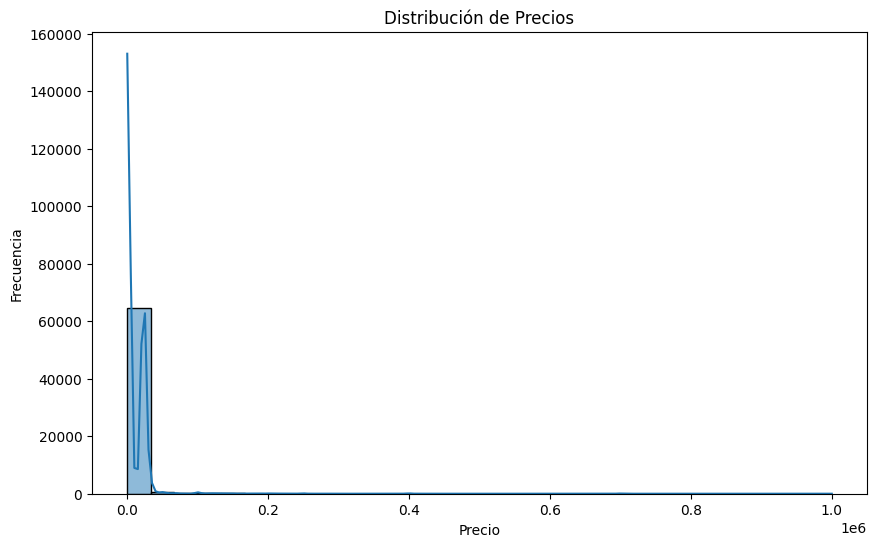

Estadísticas de precios:
count     66033.000000
mean      10998.980974
std       32910.458449
min           0.000000
25%          52.000000
50%        1571.520000
75%       22692.000000
max      999999.000000
dtype: float64


In [22]:
def safe_convert(x):
    if isinstance(x, list):
        float_list = []
        for elem in x:
            if isinstance(elem, str):
                elem = elem.replace("$", "").replace(",", "").strip()
                try:
                    float_list.append(float(elem))
                except ValueError:
                    pass
            elif isinstance(elem, (int, float)):
                float_list.append(float(elem))
        return float_list
    elif isinstance(x, str):
        try:
            try:
                val = ast.literal_eval(x)
            except (SyntaxError, ValueError):
                val = []

            if isinstance(val, list):
                float_list = []
                for elem in val:
                    if isinstance(elem, str):
                        elem = elem.replace("$", "").replace(",", "").strip()
                        float_list.append(float(elem))
                    elif isinstance(elem, (int, float)):
                        float_list.append(float(elem))
                return float_list
            else:
                return [float(val)]
        except:
            return []
    else:
        return []

df["ConvertedPrices"] = df["Prices"].apply(safe_convert)
print(df["ConvertedPrices"].head(10))

all_prices = [
    price 
    for sublist in df["ConvertedPrices"] 
    for price in sublist 
    if isinstance(price, (int, float))
]

if all_prices:
    max_price = max(all_prices)
    print(f"Maximum price: {max_price}")
else:
    print("No valid prices found.")


prices = [p for sublist in df["ConvertedPrices"] for p in sublist if isinstance(p, (int, float))]
filtered_prices = [p for p in prices if p < 1000000]
if filtered_prices:
    plt.figure(figsize=(10, 6))
    sns.histplot(filtered_prices, bins=30, kde=True)
    plt.title('Distribución de Precios')
    plt.xlabel('Precio')
    plt.ylabel('Frecuencia')
    plt.show()

    print("Estadísticas de precios:")
    print(pd.Series(filtered_prices).describe())

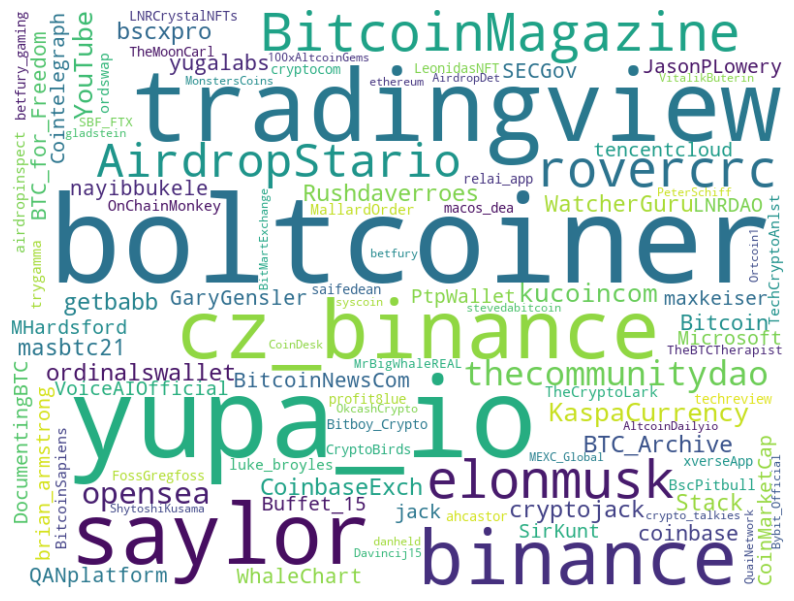

/var/folders/f6/1hghhh1x5nq6k8k89mc457j40000gq/T/ipykernel_81020/2723612040.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[m[1] for m in top_mentions], y=[m[0] for m in top_mentions], palette="Blues_r")


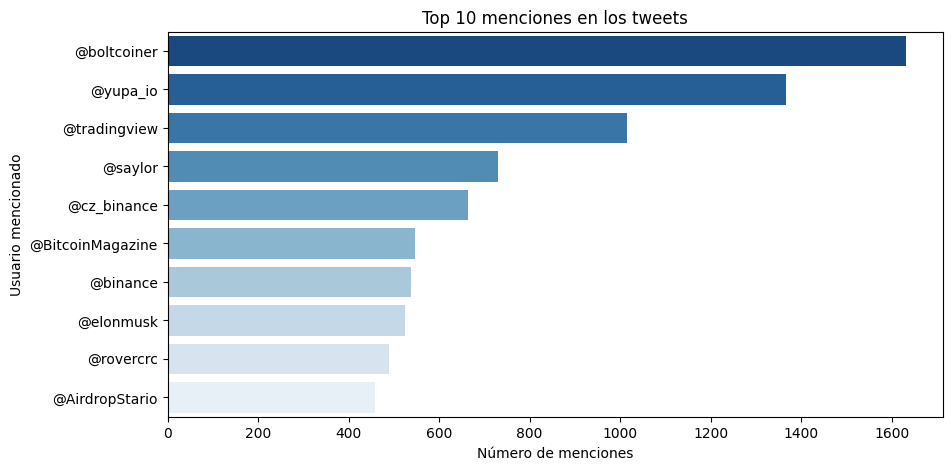

In [23]:
mentions_series = df['Mentions'].explode()
mentions_text = ' '.join(mentions_series.dropna().astype(str))

wordcloud = WordCloud(
    width=800,
    height=600,
    background_color="white",
    max_words=100,
    collocations=False
).generate(mentions_text)

wordcloud.generate(mentions_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

mentions_counts = Counter(mentions_series.dropna())
top_mentions = mentions_counts.most_common(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=[m[1] for m in top_mentions], y=[m[0] for m in top_mentions], palette="Blues_r")
plt.xlabel("Número de menciones")
plt.ylabel("Usuario mencionado")
plt.title("Top 10 menciones en los tweets")
plt.show()
